In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Common Model Algorithms
from sklearn.impute import KNNImputer
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import PoissonRegressor
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('./data.csv')

In [3]:
data.head(10)

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes,Name
0,0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,118,"Comedy,Fantasy,Romance",James Mangold,NaN,6.4,91645,"Meg Ryan,Hugh Jackman,Liev Schreiber,Breckin M..."
1,1,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,\N,100,"Comedy,Horror,Sci-Fi",NaN,Ted Newsom,5.2,370,"Kenneth Tobey,Brinke Stevens,R.G. Wilson,John ..."
2,2,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002,\N,126,Drama,Menahem Golan,NaN,5.5,911,"Crispin Glover,Vanessa Redgrave,John Hurt,Marg..."
3,3,tt0102362,movie,Istota,Istota,0,2000,\N,80,"Drama,Romance",Andrzej Czarnecki,Mikhail Shelekhov,6.3,19,"Mikhail Efremov,Rim Ayupov,Romualdas Ramanausk..."
4,4,tt0108549,movie,West from North Goes South,West from North Goes South,0,2004,\N,96,"Comedy,Mystery",NaN,Valerie Silver,7.9,41,"Shawn David Thompson,Amelia Barrett,Morris Day..."
5,5,tt0109173,movie,Auf allen Meeren,Auf allen Meeren,0,2002,\N,95,Documentary,Johannes Holzhausen,Johannes Holzhausen,7.8,29,"Johannes Holzhausen,Johannes Holzhausen,Joerg ..."
6,6,tt0112912,movie,Dune 7,Dune 7,0,2002,\N,97,Adventure,Feri Hefti,NaN,4.9,16,"Andrea Jungert,Walter Lott,David G. Muller,Dav..."
7,7,tt0113026,movie,The Fantasticks,The Fantasticks,0,2000,\N,86,"Musical,Romance",Michael Ritchie,NaN,5.7,1457,"Joel Grey,Barnard Hughes,Jean Louisa Kelly,Joe..."
8,8,tt0113086,movie,Florentino y el diablo,Florentino y el diablo,0,2000,\N,\N,Drama,Michael New,NaN,7.0,23,"Dimas González,José Torres,Michael New,Francis..."
9,9,tt0113092,movie,For the Cause,For the Cause,0,2000,\N,100,"Action,Adventure,Drama",NaN,NaN,3.4,857,"Dean Cain,Thomas Ian Griffith,Justin Whalin,Jo..."


In [4]:
data = data.drop(columns=['endYear','primaryTitle','titleType'])

In [5]:
data.columns

Index(['Unnamed: 0', 'tconst', 'originalTitle', 'isAdult', 'startYear',
       'runtimeMinutes', 'genres', 'directors', 'writers', 'averageRating',
       'numVotes', 'Name'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23595 entries, 0 to 23594
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      23595 non-null  int64  
 1   tconst          23595 non-null  object 
 2   originalTitle   23595 non-null  object 
 3   isAdult         23595 non-null  int64  
 4   startYear       23595 non-null  int64  
 5   runtimeMinutes  23595 non-null  object 
 6   genres          23595 non-null  object 
 7   directors       21281 non-null  object 
 8   writers         10832 non-null  object 
 9   averageRating   23595 non-null  float64
 10  numVotes        23595 non-null  int64  
 11  Name            23595 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 2.2+ MB


In [7]:
# Séparer la colonne 'skills' sur la virgule
genres_split = data['genres'].str.split(',', expand=True)

# Renommer les colonnes automatiquement
genres_split.columns = [f'genres_{i}' for i in genres_split.columns]

# Fusionner avec le DataFrame d'origine
data_final = data.drop(columns=['genres']).join(genres_split)

In [8]:
# Séparer la colonne 'skills' sur la virgule
name_split = data_final['Name'].str.split(',', expand=True)

# Renommer les colonnes automatiquement
name_split.columns = [f'name_{i}' for i in name_split.columns]

# Fusionner avec le DataFrame d'origine
data_final = data_final.drop(columns=['Name']).join(name_split)

In [13]:
data_final = data_final.drop(columns=['Unnamed: 0','name_3', 'name_4', 'name_5', 'name_6', 'name_7', 'name_8',
       'name_9', 'name_10', 'name_11', 'name_12', 'name_13', 'name_14',
       'name_15', 'name_16', 'name_17', 'name_18', 'name_19', 'name_20',
       'name_21', 'name_22', 'name_23', 'name_24', 'name_25', 'name_26',
       'name_27', 'name_28', 'name_29', 'name_30', 'name_31', 'name_32',
       'name_33', 'name_34', 'name_35', 'name_36', 'name_37', 'name_38',
       'name_39', 'name_40', 'name_41', 'name_42', 'name_43', 'name_44',
       'name_45', 'name_46', 'name_47'])

In [14]:
genre1_mean_rating = data_final.groupby('genres_0')['averageRating'].transform('mean')
data_final['Genre1_mean_rating'] = genre1_mean_rating

genre2_mean_rating = data_final.groupby('genres_1')['averageRating'].transform('mean')
data_final['Genre2_mean_rating'] = genre2_mean_rating

genre3_mean_rating = data_final.groupby('genres_2')['averageRating'].transform('mean')
data_final['Genre3_mean_rating'] = genre3_mean_rating

director_mean_rating = data_final.groupby('directors')['averageRating'].transform('mean')
data_final['Director_encoded'] = director_mean_rating

writer_mean_rating = data_final.groupby('writers')['averageRating'].transform('mean')
data_final['Writer_encoded'] = writer_mean_rating

actor1_mean_rating = data_final.groupby('name_0')['averageRating'].transform('mean')
data_final['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = data_final.groupby('name_1')['averageRating'].transform('mean')
data_final['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = data_final.groupby('name_2')['averageRating'].transform('mean')
data_final['Actor3_encoded'] = actor3_mean_rating

title_mean_rating = data_final.groupby('originalTitle')['averageRating'].transform('mean')
data_final['Title_encoded'] = title_mean_rating

In [15]:
data_final['runtimeMinutes'] = data_final['runtimeMinutes'].replace('\\N',None)

In [16]:
data_final['Duration'] = pd.to_numeric(data_final['runtimeMinutes'])

In [17]:
data_final['Duration'] = data_final['Duration'].fillna(data_final['Duration'].mean())

In [18]:
data_final = data_final.drop(columns=['genres_0', 'genres_1', 'genres_2', 'name_0', 'name_1', 'name_2','directors','writers','tconst','originalTitle','runtimeMinutes'])

In [19]:
# Séparation des features et de la cible
X = data_final.drop('averageRating', axis=1)
y = data_final['averageRating']

In [20]:
Model = [RandomForestRegressor(random_state=42), LinearRegression(), Ridge(alpha=1.0), Lasso(alpha=0.1), ElasticNet(alpha=0.1, l1_ratio=0.5),RandomForestRegressor(n_estimators=100, random_state=42),XGBRegressor(objective='reg:squarederror', n_estimators=100),SVR(kernel='rbf', C=100, epsilon=0.1),KNeighborsRegressor(n_neighbors=5),PoissonRegressor()]

In [21]:
for alg in Model:
    
    # Split des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Entraînement
    alg.fit(X_train, y_train)
    
    # Prédictions
    y_pred = alg.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    
    print(f"For the model {str(alg)}, R²   : {r2:.4f}")

For the model RandomForestRegressor(random_state=42), R²   : 0.9918
For the model LinearRegression(), R²   : 0.9894
For the model Ridge(), R²   : 0.9894
For the model Lasso(alpha=0.1), R²   : 0.9858
For the model ElasticNet(alpha=0.1), R²   : 0.9861
For the model RandomForestRegressor(random_state=42), R²   : 0.9918
For the model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strateg

C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\linear_model\_linear_loss.py:295: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


In [22]:
best_regressor = XGBRegressor(objective='reg:squarederror', n_estimators=100)

In [23]:
# Entraînement
best_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [24]:
# Prédiction
predictions = best_regressor.predict(X_test)
print(predictions)

[5.128386  2.5889127 3.1033227 ... 8.2036495 5.9981813 4.024257 ]


In [25]:
# Prédictions
y_pred = best_regressor.predict(X_test)

# Évaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

MAE  : 0.03
MSE  : 0.01
RMSE : 0.11
R²   : 0.9936


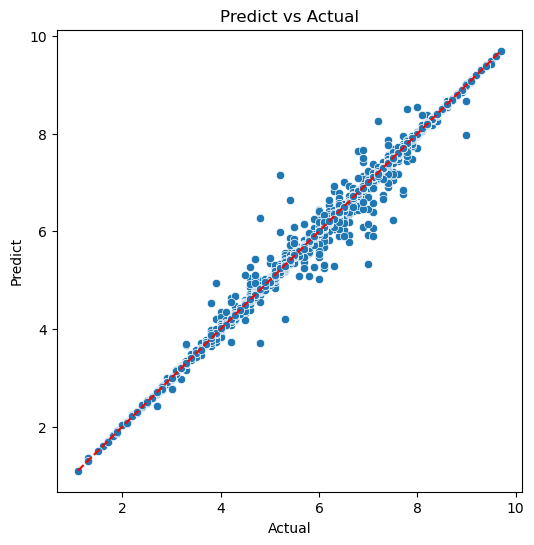

In [26]:
y_pred = best_regressor.predict(X_test)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.title("Predict vs Actual")
plt.show()

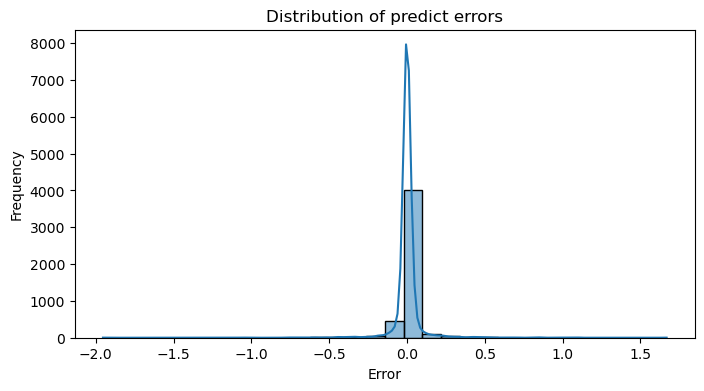

In [27]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of predict errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

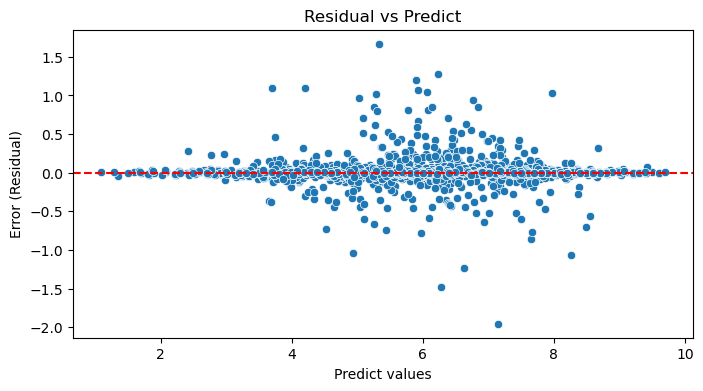

In [28]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predict values")
plt.ylabel("Error (Residual)")
plt.title("Residual vs Predict")
plt.show()

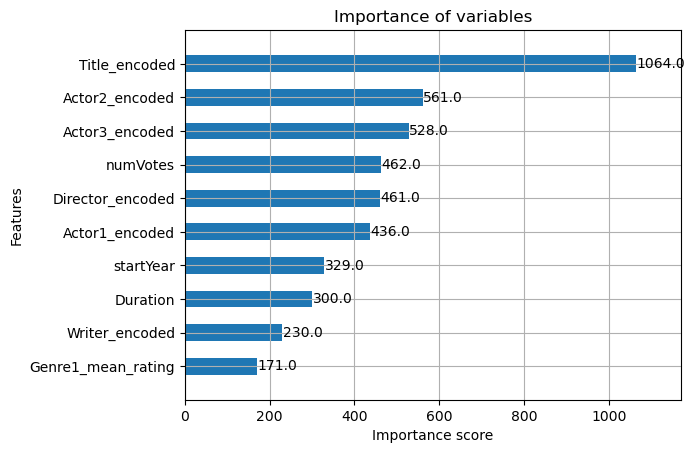

In [29]:
xgb.plot_importance(best_regressor, height=0.5, max_num_features=10)
plt.title("Importance of variables")
plt.show()